Deep Declarative Networks - Image segmentation testing
---
For local (cpuonly) torch install create a conda environment with
> conda install pytorch torchvision torchaudio cpuonly -c pytorch

> pip install -r requirements.txt

> jupyter nbextension enable --py widgetsnbextension


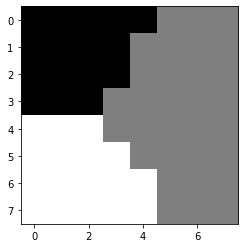

In [3]:
# Obtain PASCALVOC 2007 segmentation dataset from pytorch
# switch False to True if not already downloaded
%matplotlib inline
# or notebook for interactive?
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torch
from PIL import Image

image = Image.open('./data/clean.png')
voc = torchvision.datasets.VOCSegmentation(root='./data/voc07/', year='2007', image_set='train', download=False)

# cifar10 = torchvision.datasets.CIFAR10(root='./data/cifar10/', train=True, download= False)
# image,target = cifar10[0]
plt.imshow(image)

In [ ]:
# import skimage

# # This is a simple dissimilarity graph creation, using absolute intensity differences
# # calculated using YUV colour space (thanks scikit-image package for doing everything)
# def create_graph(image):
#     # create the pixel graph with edge weights as dissimilarities
#     yuv = skimage.color.rgb2yiq(image)
#     (w, h) = yuv.shape[:2]
#     edges_img = np.zeros((h, w))
#     for i in range(yuv.shape[0]):
#         for j in range(yuv.shape[1]):
#             # compute edge weight for nbd pixel nodes for the node i,j
#             for i1 in range(i-1, i+2):
#                 for j1 in range(j-1, j+2):
#                     if i1 == i and j1 == j: continue
#                     if i1 >= 0 and j1 >= 0 and i1 < h and j1 < w:
#                         wt = np.abs(yuv[i,j,0]-yuv[i1,j1,0]) # how dissimilar they are
#                         edges_img[i1,j1] = wt
#     return edges_img

In [ ]:
# def brightness(r,g,b):
#     return 0.2126 * r + 0.7152 * g + 0.0722 * b

In [ ]:
# def guassian_kernel(image):
#     r = 5 # radius for pixel weights
#     sigma_I = 1
#     sigma_x = 1
    
    
    
#     (w, h) = yuv.shape[:2]
#     edges_img = np.zeros((h, w))
#     for x in range(w):
#         for y in range(h):
#             if
#             edges[x,y] = 
            

In [ ]:
# plt.clf()
# w = create_graph(image)
# plt.imshow(w)

In [ ]:
# # Now we can do normalised cutting from [Shi & Malik (2000)] https://people.eecs.berkeley.edu/~malik/papers/SM-ncut.pdf
# w.shape

In [ ]:
import scipy

# 4 Connected neighbours adjacency matrix (generic W)
def create_adjacency(image):
    r,c = image.size
    d1 = np.tile(np.append(np.ones(c-1), [0]), r)[:-1]
    d2 = np.ones(c*(r-1))
    upper_diags = scipy.sparse.diags([d1, d2], [1, c])
    return upper_diags + upper_diags.T

In [ ]:
test = create_adjacency(image)
print(test.shape)
print(test.toarray())

In [2]:
# OLD STUFF FROM in[1]
# voc = torchvision.datasets.VOCSegmentation(root='./data/voc07/', year='2007', image_set='train', download=False)
# # voc = torchvision.datasets.VOCDetection(root='./data/voc07detect/', year='2007', image_set='train', download=False)
# # each index is a tuple of (image, segmentation)

# img = voc[0][0]
# plt.imshow(img)

# img.getpixel((0,0))[0]

# CITYSCAPES DATASET (these images are big...)

import torch
import torchvision
from torchvision import transforms, datasets

# https://github.com/pytorch/vision/issues/2212#issuecomment-944225785
# Compose and StandardCompose don't work together nicely?

data_transform = transforms.Compose([
    transforms.Resize(size=(100,100)),
    transforms.Grayscale(1),
    transforms.ToTensor()
    ])
    
train_city = torchvision.datasets.Cityscapes(root='./data/cityscapes/', split='train', mode='fine',
                     target_type='semantic', transforms=data_transform)

test_city = torchvision.datasets.Cityscapes(root='./data/cityscapes/', split='test', mode='fine',
                     target_type='semantic', transforms=data_transform)

train_loader = torch.utils.data.DataLoader(train_city, batch_size=1, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_city, batch_size=1, shuffle=True)

# visualise
train_img = next(iter(train_loader))

TypeError: __call__() takes 2 positional arguments but 3 were given